In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Auxiliary Functions

In [2]:
def show_business_rating_dist(df):
    # Count stars
    stars = []
    for i in range(9):
        stars.append(df[df['stars'] == (i + 2) * 0.5])
    star_counts = [len(df.index) for df in stars]
    print(star_counts)

    # Generate pie chart
    plt.figure(figsize=(6,9))
    labels = ['1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5']
    colors = ['orange','yellowgreen','lightskyblue','yellow', 'red', 'purple', 'blue', 'green', 'pink']
    explode = (0, 0, 0, 0, 0, 0, 0, 0, 0)
    plt.pie(
        star_counts,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct = '%3.2f%%',
        shadow = False,
        startangle =90,
        pctdistance = 0.6
    )
    plt.axis('equal')
    plt.show()

In [3]:
def show_review_rating_dist(df):
    # Count stars
    stars = []
    for i in range(5):
        stars.append(df[df['stars'] == i + 1])
    star_counts = [len(df.index) for df in stars]
    print(star_counts)

    # Generate pie chart
    plt.figure(figsize=(6,9))
    labels = ['1', '2', '3', '4', '5']
    colors = ['orange','yellowgreen','lightskyblue','yellow', 'red']
    explode = (0, 0, 0, 0, 0)
    plt.pie(
        star_counts,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct = '%3.2f%%',
        shadow = False,
        startangle =90,
        pctdistance = 0.6
    )
    plt.axis('equal')
    plt.show()

# Read CSVs

In [4]:
# Read the two CSV files to pandas dataframes

df_business = pd.read_csv('business.csv')
df_review = pd.read_csv('review.csv')

In [5]:
# Delete unneeded keys in df_business

preserved_keys_business = ['business_id', 'name', 'categories', 'stars']
for key in df_business.keys():
    if key not in preserved_keys_business:
        del df_business[key]
print(df_business.keys())

Index(['stars', 'business_id', 'name', 'categories'], dtype='object')


In [6]:
# Delete unneeded keys in df_review

preserved_keys_review = ['text', 'business_id', 'stars']
for key in df_review.keys():
    if key not in preserved_keys_review:
        del df_review[key]
print(df_review.keys())

Index(['text', 'stars', 'business_id'], dtype='object')


# Statistics on Distribution of Rating Stars

174567
[3788, 4303, 9320, 16148, 23142, 32038, 33492, 24796, 27540]


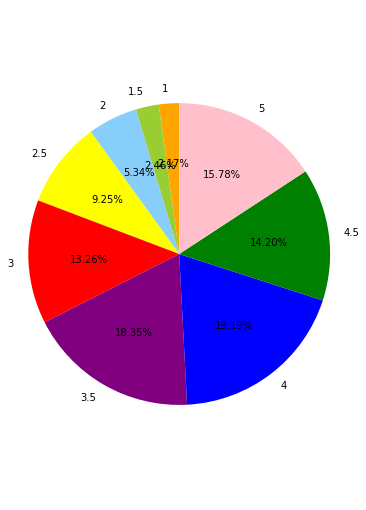

In [7]:
# Rating star distribution of df_business
print(len(df_business.index))
show_business_rating_dist(df_business)

5261669
[731363, 438161, 615481, 1223316, 2253348]


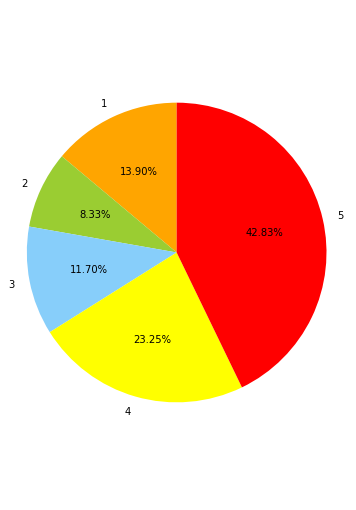

In [8]:
# Rating star distribution of df_review

print(len(df_review.index))
show_review_rating_dist(df_review)

# Preprocess Data
# Statistics on the New Distribution of Rating Stars

In [9]:
# Filter 'Restaurants' businesses

df_restaurants = df_business[df_business['categories'].str.contains('Restaurants')]

54618
[348, 1131, 2945, 5448, 9825, 13387, 13526, 6516, 1492]


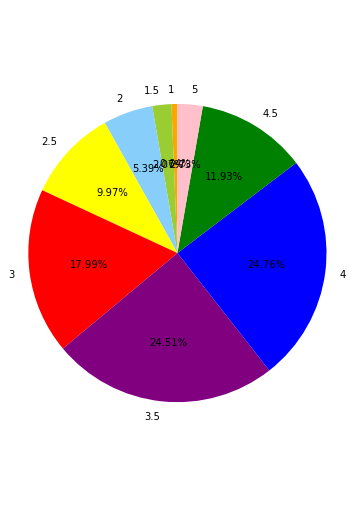

In [10]:
# Rating star distribution of df_restaurants

print(len(df_restaurants.index))
show_business_rating_dist(df_restaurants)

In [11]:
# Merge the reviews with restaurants by key 'business_id'

del df_restaurants['stars'] # delete 'stars' key to avoid renaming due to naming conflict
combo = pd.merge(df_restaurants, df_review, how='outer', on='business_id')
del combo['business_id'] # delete 'business_id' key as it is no longer needed after merging
print(combo.keys())

Index(['name', 'categories', 'text', 'stars'], dtype='object')


In [12]:
# drop rows with at least one NaN value
combo.dropna(inplace=True)

In [13]:
# remove any duplicated reviews
combo.drop_duplicates(inplace=True)

In [15]:
# remove any non-ASCII characters
combo.replace({r'[^\x00-\x7F]+': ''}, regex=True, inplace=True)

In [18]:
# lowercase all the letters
combo['name'] = combo['name'].astype(str).str.lower()
combo['categories'] = (combo['categories'].astype(str).str.lower()).astype(list)
combo['text'] = combo['text'].astype(str).str.lower()

In [19]:
# remove the new line characters in reviews
combo.replace({r'\n+': ''}, regex=True, inplace=True)

In [20]:
# add space between alphanumerical characters and punctuation marks (one direction)
combo.replace({r'([a-z0-9])([,:;.!?"()])': r'\1 \2'}, regex=True, inplace=True)

In [21]:
# add space between alphanumerical characters and punctuation marks (the other direction)
combo.replace({r'([,:;.!?"()])([a-z0-9])': r'\1 \2'}, regex=True, inplace=True)

In [22]:
# remove reviews with more than 60 words (including punctuations)
combo = combo[combo['text'].apply(lambda x: len(x.split(' ')) <= 60)]

1077585
[98488, 67886, 105589, 271020, 534602]


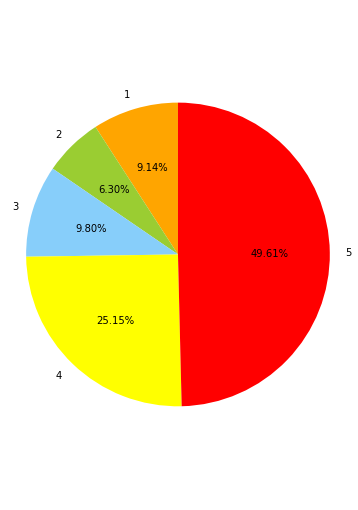

In [23]:
# Rating star distribution of filtered reviews

print(len(combo.index))
show_review_rating_dist(combo)

# Save to CSV

In [24]:
save_file = combo.head(200000)
save_file.to_csv('restaurant_review.csv', sep='\t', encoding='utf-8')

200000
[18758, 13033, 20086, 50157, 97966]


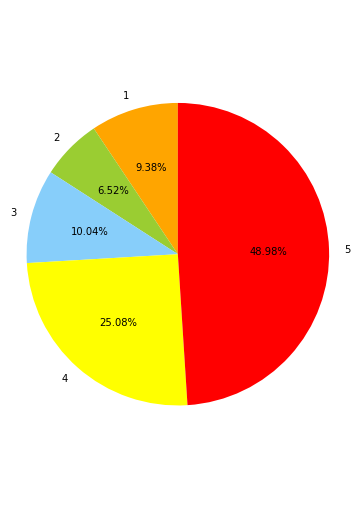

In [25]:
# Rating star distribution of filtered reviews

print(len(save_file.index))
show_review_rating_dist(save_file)